The scikit learn version is 0.22.1.
(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0
(112, 2) (112,)
[[-29.11573944  17.36341433]
 [  2.56887758  -4.93286119]
 [  6.5199553    0.3687185 ]]
[-17.34286066  -0.472027    -4.76247294]
[0]
[[ 20.79544829  -4.1242975  -12.94321403]]
0.8125
0.631578947368421
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.42      0.73      0.53        11
   virginica       0.73      0.42      0.53        19

    accuracy                           0.63        38
   macro avg       0.72      0.72      0.69        38
weighted avg       0.70      0.63      0.63        38

[[ 8  0  0]
 [ 0  8  3]
 [ 0 11  8]]
My name is Yohanes Susanto
My NetID is: yohanes2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


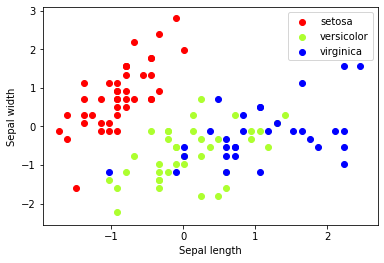

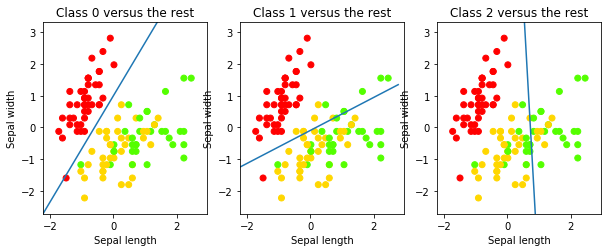

In [14]:
#Our first machine learning model
#Garreta and Moncecchi pp 10-20
#uses Iris database and SGD classifier
import sklearn
import numpy as np
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print( X_iris.shape, y_iris.shape)
#(150, 4) (150,)
print( X_iris[0], y_iris[0])
#(150, 4) (150,)
#[ 5.1  3.5  1.4  0.2] 0

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)
#(112, 2) (112,)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train) 
print(clf.coef_)
print(clf.intercept_)
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)    
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
#[0]

print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )
#[[ 19.73905808 8.13288449 -28.63499119]]

from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )
#0.821428571429

y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )
#0.684210526316

print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )
#precision recall f1-score support
#setosa 1.00 1.00 1.00 8
#versicolor 0.43 0.27 0.33 11
#virginica 0.65 0.79 0.71 19
#avg / total 0.66 0.68 0.66 38

print( metrics.confusion_matrix(y_test, y_pred) )
#[[ 8 0 0]
#[ 0 3 8]
#[ 0 4 15]]

print("My name is Yohanes Susanto")
print("My NetID is: yohanes2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
######STOP HERE######################